In [1]:
#  基本信息
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 股票数据的获取
import pandas_datareader as pdr

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# time
from datetime import datetime


In [3]:
# 抓取全球前五的企业股票数据，时间是2015年到现在
start = datetime(2015,1,1)
company = ['AAPL','GOOG','MSFT','AMZN','FB']
top_tech_df = pdr.get_data_yahoo(company,start=start)['Adj Close'] # 只获取Adj Close这一列

In [4]:
top_tech_df.to_csv('top5.csv')

In [5]:
top_tech_df.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,100.905785,310.350006,78.019997,524.958740,41.471783
2015-01-02,99.945885,308.519989,78.449997,523.373108,41.748566
2015-01-05,97.130241,302.190002,77.190002,512.463013,41.364658
2015-01-06,97.139420,295.290009,76.150002,500.585632,40.757530
2015-01-07,98.501518,298.420013,76.150002,499.727997,41.275364


In [6]:
top_tech_df.tail()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2020-07-17,385.309998,2961.969971,242.029999,1515.550049,202.880005
2020-07-20,393.429993,3196.840088,245.419998,1565.719971,211.600006
2020-07-21,388.000000,3138.290039,241.750000,1558.420044,208.750000
2020-07-22,389.089996,3099.909912,239.869995,1568.489990,211.750000
2020-07-23,371.380005,2986.550049,232.600006,1515.680054,202.539993


In [7]:
top_tech_dr = top_tech_df.pct_change() #天与天之间的变化

In [8]:
top_tech_dr.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.005897,0.005511,-0.003020,0.006674
2015-01-05,-0.028172,-0.020517,-0.016061,-0.020846,-0.009196
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.014677
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.012705


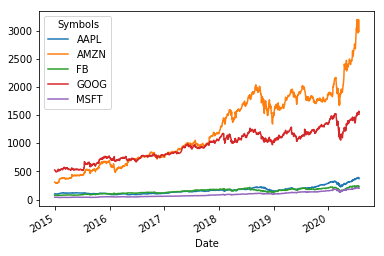

In [9]:
top_tech_df.plot()

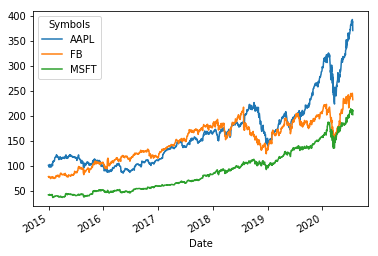

In [10]:
top_tech_df[['AAPL','FB','MSFT']].plot()

D:\SoftwareInstallation\python_Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


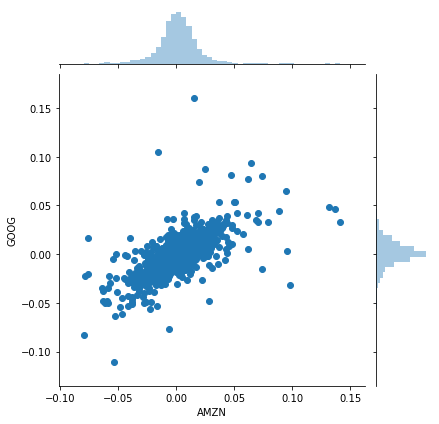

In [12]:
sns.jointplot('AMZN','GOOG',top_tech_dr,kind='scatter') # x和y的取值是亚马逊和谷歌，两者股票的变化呈正相关

D:\SoftwareInstallation\python_Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


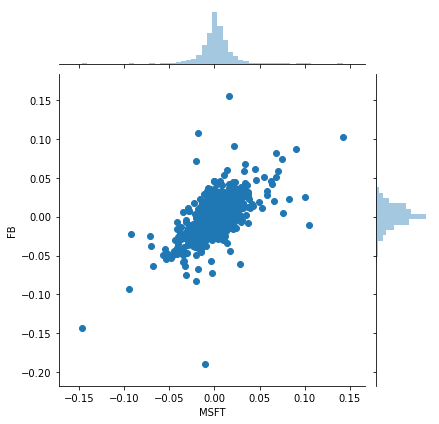

In [13]:
sns.jointplot('MSFT','FB',top_tech_dr,kind='scatter')# x和y的取值是微软和Facebook

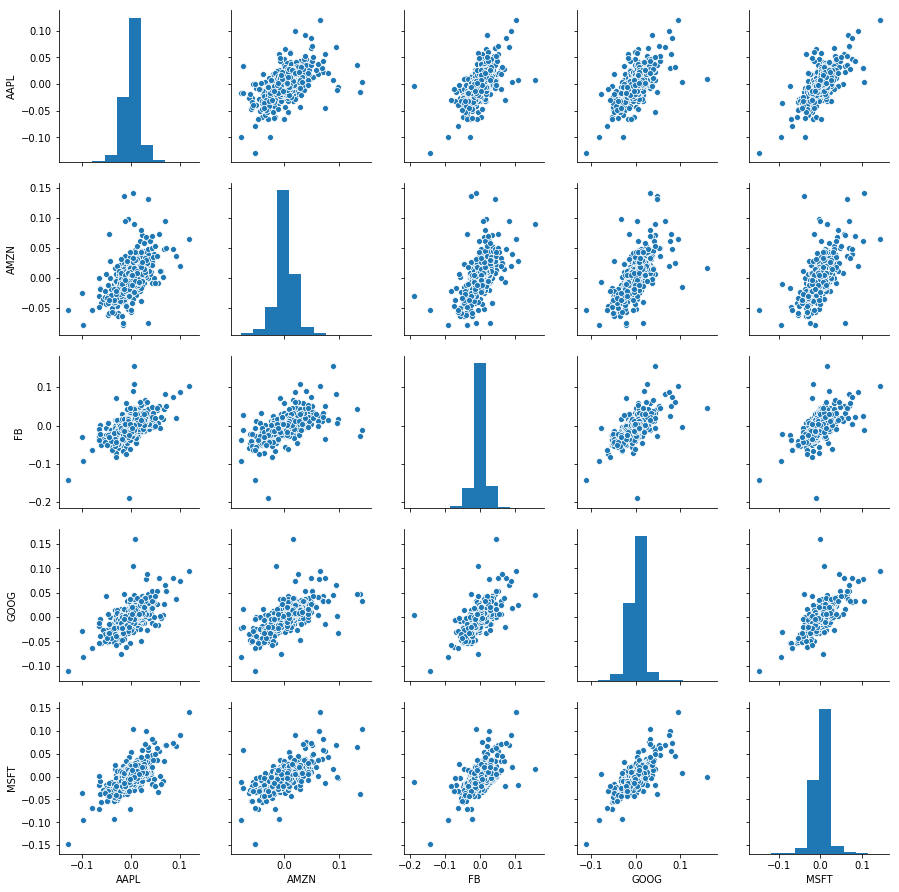

In [14]:
sns.pairplot(top_tech_dr.dropna()) # 使每两个企业都进行一次比较